In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\\Users\\owner\\Downloads\\paper.txt",sep="\s", header= None)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.drop([1,3], axis=1, inplace=True)

In [53]:
df.head()

,x1,x2,x3
0,0.801,121.41,70.42
1,0.824,127.70,72.47
2,0.841,129.20,78.20
3,0.816,131.80,74.89
4,0.840,135.10,71.21


In [5]:
df.rename({0:"x1",2:"x2",4:"x3"},axis=1, inplace=True)

In [6]:
df.head()

,x1,x2,x3
0,0.801,121.41,70.42
1,0.824,127.70,72.47
2,0.841,129.20,78.20
3,0.816,131.80,74.89
4,0.840,135.10,71.21


In [7]:
df.describe()

,x1,x2,x3
count,41.000000,41.000000,41.000000
mean,0.811854,120.953415,67.723171
std,0.035561,7.702022,9.790642
min,0.758000,103.510000,48.930000
25%,0.795000,115.100000,56.530000
50%,0.815000,121.410000,70.700000
75%,0.826000,126.700000,74.890000
max,0.971000,135.100000,80.330000


In [8]:
q11, q31= np.percentile(df['x1'],[25,75])
iqr_x1 = q31 - q11

In [9]:
q12, q32= np.percentile(df['x2'],[25,75])
iqr_x2 = q32 - q12

In [10]:
q13, q33= np.percentile(df['x3'],[25,75])
iqr_x3 = q33 - q13

In [11]:
lower_bound_x1 = q11 -(1.5 * iqr_x1) 
upper_bound_x1 = q31 +(1.5 * iqr_x1)

In [12]:
lower_bound_x2 = q12 -(1.5 * iqr_x2) 
upper_bound_x2 = q32 +(1.5 * iqr_x2)

In [13]:
lower_bound_x3 = q13 -(1.5 * iqr_x3) 
upper_bound_x3 = q33 +(1.5 * iqr_x3)

In [58]:
lower_bound_x1

0.7485000000000002

In [59]:
upper_bound_x1

0.8724999999999998

In [64]:
for x in df["x1"]:
    if ((x<lower_bound_x1) | (x>upper_bound_x1)):
        print(x)

0.971


In [65]:
for x in df["x2"]:
    if ((x<lower_bound_x2) | (x>upper_bound_x2)):
        print(x)

In [66]:
for x in df["x3"]:
    if ((x<lower_bound_x3) | (x>upper_bound_x3)):
        print(x)

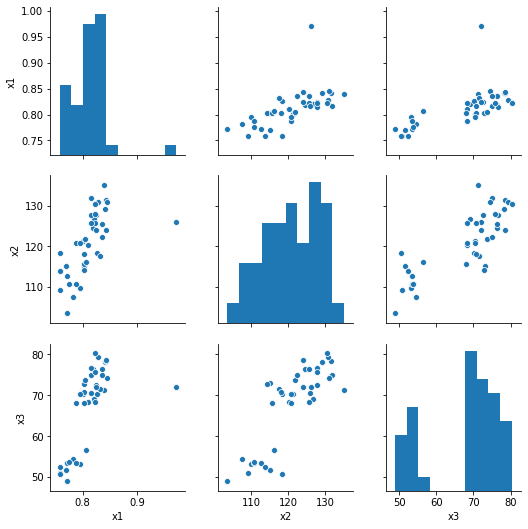

In [14]:
sns.pairplot(df)

In [15]:
X= np.array([6,1,2])
Y=np.array([-1,2,1])

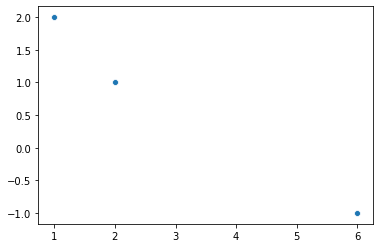

In [16]:
sns.scatterplot(X,Y)

In [17]:
len_X= np.sqrt(np.matrix.transpose(X)@X)
len_Y= np.sqrt(np.matrix.transpose(Y)@Y)
dp_XY= np.dot(X,Y)

In [18]:
np.arccos(dp_XY/(len_Y*len_Y))

1.9106332362490186

In [19]:
beta = (np.matrix.transpose(X)@Y) / (np.matrix.transpose(X)@X)
print("projection of y on X=:\n",beta*X)

projection of y on X=:
 [-0.29268293 -0.04878049 -0.09756098]


In [20]:
Q= np.array([[4/13,11/13],[-11/13,4/13]])
Q

array([[ 0.30769231,  0.84615385],
       [-0.84615385,  0.30769231]])

In [21]:
q1= np.array([4/13,-11/13])
q2= np.array([11/13,4/13])
print("The dot product of two columns of a matrix is zero:\n",np.dot(q1,q2))
print("The length of each vector should be 1:\n",np.sqrt(np.matrix.transpose(q1)@q1), np.sqrt(np.matrix.transpose(q2)@q2))

The dot product of two columns of a matrix is zero:
 0.0
The length of each vector should be 1:
 0.9003615315938174 0.9003615315938174


In [22]:
A= np.array([[9,-3],[-3,5]])
A

array([[ 9, -3],
       [-3,  5]])

In [23]:
ATA = A@np.matrix.transpose(A)
ATA

array([[ 90, -42],
       [-42,  34]])

In [24]:
evals,evecs = np.linalg.eig(ATA)
print("The eigen values of ATA are:\n",evals)
print("\n")
print("The eigen vectors of ATA are:\n",evecs)

The eigen values of ATA are:
 [112.47771786  11.52228214]


The eigen vectors of ATA are:
 [[ 0.8816746   0.47185793]
 [-0.47185793  0.8816746 ]]


In [25]:
np.linalg.svd(A)

(array([[-0.8816746 ,  0.47185793],
        [ 0.47185793,  0.8816746 ]]),
 array([10.60555128,  3.39444872]),
 array([[-0.8816746 ,  0.47185793],
        [ 0.47185793,  0.8816746 ]]))

In [26]:
A= np.array([[2,1],[1,4]])
B= np.array([[1,4,3],[5,1,3]])
C= np.array([[1,4],[3,2]])


In [27]:
print(A)
print("\n")
print("The transpose of a transpose of a matrix is equal to the matrix:\n", np.matrix.transpose(np.matrix.transpose(A)))

[[2 1]
 [1 4]]


The transpose of a transpose of a matrix is equal to the matrix:
 [[2 1]
 [1 4]]


In [28]:
Cinv_T= np.matrix.transpose(np.linalg.inv(C))
CT= np.matrix.transpose(C)
CT_inv= np.linalg.inv(CT)
print("The transpose of a matrix inverse is equal to inverse of its transpose:\n" )
print("CT_inv=:\n ", CT_inv)
print("\n")
print("Cinv_T=:\n ", Cinv_T)

The transpose of a matrix inverse is equal to inverse of its transpose:

CT_inv=:
  [[-0.2  0.3]
 [ 0.4 -0.1]]


Cinv_T=:
  [[-0.2  0.3]
 [ 0.4 -0.1]]


In [29]:
ABt= np.matrix.transpose(A@B)
BtAt= np.matrix.transpose(B)@np.matrix.transpose(A)
print(ABt)
print("\n")
print(BtAt)

[[ 7 21]
 [ 9  8]
 [ 9 15]]


[[ 7 21]
 [ 9  8]
 [ 9 15]]


In [30]:
A= np.array([[-1,3],[5,2]])
B= np.array([[4,-3],[1,-3],[-2,0]])
C= np.array([5,-3,2])


In [31]:
5*A

array([[-5, 15],
       [25, 10]])

In [32]:
B@A

array([[-19,   6],
       [-16,  -3],
       [  2,  -6]])

In [33]:
np.matrix.transpose(A)@np.matrix.transpose(B)

array([[-19, -16,   2],
       [  6,  -3,  -6]])

In [34]:
np.matrix.transpose(C)@B

array([13, -6])

In [35]:
A@B

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [36]:
A= np.array([[1,2],[2,-3]])
evals, evecs= np.linalg.eig(A)
print("The eigen values of A are:\n",evals)
print("\n")
print("The eigen vectors of A are:\n",evecs)

The eigen values of A are:
 [ 1.82842712 -3.82842712]


The eigen vectors of A are:
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


In [37]:
np.linalg.inv(A)

array([[ 0.42857143,  0.28571429],
       [ 0.28571429, -0.14285714]])

In [38]:
evals, evecs= np.linalg.eig(np.linalg.inv(A))
print("The eigen values of Ainverse are:\n",evals)
print("\n")
print("The eigen vectors of Ainverse are:\n",evecs)

The eigen values of Ainverse are:
 [ 0.54691816 -0.26120387]


The eigen vectors of Ainverse are:
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


In [39]:
A= np.array([[4,8,7],[3,5,-10]])
AAt= A@np.matrix.transpose(A)
AtA= np.matrix.transpose(A)@A
evals, evecs = np.linalg.eig(AAt)
evals1, evecs1 = np.linalg.eig(AtA)
print("eigenvalues of AAt\n", evals)
print("\n")
print("eigenvectors of AAt\n", evecs)
print("\n")
print("eigenvalues of AtA\n", evals1)
print("\n")
print("eigenvectors of AtA\n", evecs)
print("\n")

eigenvalues of AAt
 [113.32721815 149.67278185]


eigenvectors of AAt
 [[-0.75417782  0.65667025]
 [-0.65667025 -0.75417782]]


eigenvalues of AtA
 [  0.         113.32721815 149.67278185]


eigenvectors of AtA
 [[-0.75417782  0.65667025]
 [-0.65667025 -0.75417782]]




In [40]:
np.linalg.svd(A)

(array([[-0.65667025,  0.75417782],
        [ 0.75417782,  0.65667025]]),
 array([12.2340828 , 10.64552573]),
 array([[-0.029765  , -0.12117565, -0.99218471],
        [ 0.46843361,  0.87518212, -0.12093886],
        [-0.88299717,  0.46837241, -0.03071294]]))

In [41]:
Cv= np.array([[4,0,0],[0,8,0],[0,0,2]])
Cv_inv=np.linalg.inv(Cv)
evals,evecs= np.linalg.eig(Cv_inv)
evals1,evecs1= np.linalg.eig(Cv)
print("The inverse of covariance matrix= \n", Cv_inv)
print("\n")
print("The eigen values of inverse of Cv:\n",evals)
print("\n")
print("The eigen vectors of inverse of Cv:\n",evecs)
print("\n")
print("The eigen values of Cv:\n",evals1)
print("\n")
print("The eigen vectors of Cv:\n",evecs1)


The inverse of covariance matrix= 
 [[0.25  0.    0.   ]
 [0.    0.125 0.   ]
 [0.    0.    0.5  ]]


The eigen values of inverse of Cv:
 [0.25  0.125 0.5  ]


The eigen vectors of inverse of Cv:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


The eigen values of Cv:
 [4. 8. 2.]


The eigen vectors of Cv:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [50]:
n=3
p=4
A= np.random.randn(n,p)
AtA= np.matrix.transpose(A)@A
evals,evecs= np.linalg.eig(AtA)
print("The shape of AtA:\n",AtA.shape)
print("\n")
print("AtA will be positive definite if all its eigen values are postive:\n",evals)

The shape of AtA:
 (4, 4)


AtA will be positive definite if all its eigen values are postive:
 [ 1.02109041e+01  1.66810250e+00 -9.58381721e-17  1.52426944e-02]


In [100]:
A= (np.random.randn(3,3))
A

array([[ 1.02264881, -1.45425704,  0.305973  ],
       [ 0.42667643, -0.76700306, -0.00480327],
       [-0.09122913, -1.95181165, -1.03480558]])

In [101]:
A[:,1]=A[:,2]
detA= np.linalg.det(A)
evals,evecs= np.linalg.eig(A)
print("Determinant of a singualr matrix is zero:\n",detA)
print("\n")
print("The eigen values of A are :\n",evals)

Determinant of a singualr matrix is zero:
 -9.042472880259012e-18


The eigen values of A are :
 [ 1.07127202e+00  4.25007252e-17 -1.08823207e+00]
